## Loans for petroleum products
- Drivers obtain loans from microfinance institutions for fueling subsidie
- As a risk analyst in the loan business department, you need to analyze the historical loan records and try to use this data set to train a decision tree model

### Import the libraries of data analysis

In [2]:
import pandas as pd
import numpy as np
import os
os.environ["PATH"]+=os.pathsep+"C:/Program Files (x86)/Graphviz2.38/bin"

### Import the data

In [3]:
data = pd.read_excel("oil_data_for_tree.xlsx")
data.head()

,uid,oil_actv_dt,create_dt,total_oil_cnt,pay_amount_total,class_new,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount,channel_code,oil_code,scene,source_app,call_source
0,A8217710,2018-08-19,2018-08-17,275.0,48295495.4,B,0,3308.56,1760081.0,1796001.0,1731081.0,8655401.0,1.0,1.0,1,3,2,0,3
1,A8217710,2018-08-19,2018-08-16,275.0,48295495.4,B,0,4674.68,2487045.0,2537801.0,2437845.0,12189221.0,1.0,1.0,1,3,2,0,3
2,A8217710,2018-08-19,2018-08-15,275.0,48295495.4,B,0,1873.06,977845.0,997801.0,961845.0,4809221.0,1.0,1.0,1,2,2,0,3
3,A8217710,2018-08-19,2018-08-14,275.0,48295495.4,B,0,4837.78,2526441.0,2578001.0,2484441.0,12422201.0,1.0,1.0,1,2,2,0,3
4,A8217710,2018-08-19,2018-08-13,275.0,48295495.4,B,0,2586.38,1350441.0,1378001.0,1328441.0,6642201.0,1.0,1.0,1,2,2,0,3


### Data preprocess
- original_list does not need to make special transformation
- aggregate_list is a list containing aggregated numeric vaviables
- distinct_list is a list containing the distinct and counted text vaviable

In [4]:
original_list=["uid","oil_actv_dt","create_dt","class_new","bad_ind"]
aggregate_list=["oil_amount","discount_amount","sale_amount","amount","pay_amount","coupon_amount","payment_coupon_amount"]
distinct_list=["channel_code","oil_code","scene","source_app","call_source"]

### Data reorganization

In [5]:
df=data[original_list].copy()
df.head()

,uid,oil_actv_dt,create_dt,class_new,bad_ind
0,A8217710,2018-08-19,2018-08-17,B,0
1,A8217710,2018-08-19,2018-08-16,B,0
2,A8217710,2018-08-19,2018-08-15,B,0
3,A8217710,2018-08-19,2018-08-14,B,0
4,A8217710,2018-08-19,2018-08-13,B,0


In [6]:
df[aggregate_list]=data[aggregate_list].copy()
df.head()

,uid,oil_actv_dt,create_dt,class_new,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount
0,A8217710,2018-08-19,2018-08-17,B,0,3308.56,1760081.0,1796001.0,1731081.0,8655401.0,1.0,1.0
1,A8217710,2018-08-19,2018-08-16,B,0,4674.68,2487045.0,2537801.0,2437845.0,12189221.0,1.0,1.0
2,A8217710,2018-08-19,2018-08-15,B,0,1873.06,977845.0,997801.0,961845.0,4809221.0,1.0,1.0
3,A8217710,2018-08-19,2018-08-14,B,0,4837.78,2526441.0,2578001.0,2484441.0,12422201.0,1.0,1.0
4,A8217710,2018-08-19,2018-08-13,B,0,2586.38,1350441.0,1378001.0,1328441.0,6642201.0,1.0,1.0


In [7]:
df[distinct_list]=data[distinct_list].copy()
df.head()

,uid,oil_actv_dt,create_dt,class_new,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount,channel_code,oil_code,scene,source_app,call_source
0,A8217710,2018-08-19,2018-08-17,B,0,3308.56,1760081.0,1796001.0,1731081.0,8655401.0,1.0,1.0,1,3,2,0,3
1,A8217710,2018-08-19,2018-08-16,B,0,4674.68,2487045.0,2537801.0,2437845.0,12189221.0,1.0,1.0,1,3,2,0,3
2,A8217710,2018-08-19,2018-08-15,B,0,1873.06,977845.0,997801.0,961845.0,4809221.0,1.0,1.0,1,2,2,0,3
3,A8217710,2018-08-19,2018-08-14,B,0,4837.78,2526441.0,2578001.0,2484441.0,12422201.0,1.0,1.0,1,2,2,0,3
4,A8217710,2018-08-19,2018-08-13,B,0,2586.38,1350441.0,1378001.0,1328441.0,6642201.0,1.0,1.0,1,2,2,0,3


#### Check for NAN values

In [8]:
df.isna().sum()

uid                         0
oil_actv_dt                 0
create_dt                4944
class_new                   0
bad_ind                     0
oil_amount               4944
discount_amount          4944
sale_amount              4944
amount                   4944
pay_amount               4944
coupon_amount            4944
payment_coupon_amount    4946
channel_code                0
oil_code                    0
scene                       0
source_app                  0
call_source                 0
dtype: int64

#### Descriptive statistics

In [9]:
df.describe()

,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount,channel_code,oil_code,scene,source_app,call_source
count,50609.000000,45665.000000,4.566500e+04,4.566500e+04,4.566500e+04,4.566500e+04,45665.000000,45663.000000,50609.000000,50609.000000,50609.000000,50609.000000,50609.000000
mean,0.017764,425.376107,1.832017e+05,1.881283e+05,1.808673e+05,9.043344e+05,0.576853,149.395397,1.476378,1.617894,1.906519,0.306072,2.900729
std,0.132093,400.596244,2.007574e+05,2.048742e+05,1.977035e+05,9.885168e+05,0.494064,605.138823,1.511470,3.074166,0.367280,0.893682,0.726231
min,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,175.440000,6.039100e+04,6.200100e+04,5.976100e+04,2.988010e+05,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,3.000000
50%,0.000000,336.160000,1.229310e+05,1.279240e+05,1.209610e+05,6.048010e+05,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,3.000000
75%,0.000000,557.600000,2.399050e+05,2.454010e+05,2.360790e+05,1.180391e+06,1.000000,100.000000,1.000000,0.000000,2.000000,0.000000,3.000000
max,1.000000,7952.820000,3.916081e+06,3.996001e+06,3.851081e+06,1.925540e+07,1.000000,50000.000000,6.000000,9.000000,2.000000,3.000000,4.000000


- The probability distribution of data changes with time, and we cannot use all historical data for modeling.
- We better use data from the last six months
- We need to complete the date data and intercept the last six months of data for analysis

##### The loan date and account activation date complement each other

In [10]:
def time_isna(x,y):
    if str(x) == "NaT":
        x=y
    else:
        x=y
    return x

In [11]:
df2=df.sort_values(["uid","create_dt"],ascending=False)
df2.head()

,uid,oil_actv_dt,create_dt,class_new,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount,channel_code,oil_code,scene,source_app,call_source
50608,B96436391985035703,2018-10-08,NaT,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4
50607,B96436391984693397,2018-10-11,NaT,E,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4
50606,B96436391977217468,2018-10-17,NaT,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4
50605,B96436391976480892,2018-09-28,NaT,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4
50604,B96436391972106043,2018-10-19,NaT,A,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4


In [12]:
df2["create_dt"] = df2.apply(lambda x: time_isna(x.create_dt,x.oil_actv_dt),axis=1)
df2.head()

,uid,oil_actv_dt,create_dt,class_new,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount,channel_code,oil_code,scene,source_app,call_source
50608,B96436391985035703,2018-10-08,2018-10-08,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4
50607,B96436391984693397,2018-10-11,2018-10-11,E,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4
50606,B96436391977217468,2018-10-17,2018-10-17,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4
50605,B96436391976480892,2018-09-28,2018-09-28,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4
50604,B96436391972106043,2018-10-19,2018-10-19,A,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4


- we select data from 3 months(180 days) 

In [13]:
df2["dtn"]=(df2.oil_actv_dt-df2.create_dt).apply(lambda x :x.days)
df2.head()

,uid,oil_actv_dt,create_dt,class_new,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount,channel_code,oil_code,scene,source_app,call_source,dtn
50608,B96436391985035703,2018-10-08,2018-10-08,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0
50607,B96436391984693397,2018-10-11,2018-10-11,E,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0
50606,B96436391977217468,2018-10-17,2018-10-17,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0
50605,B96436391976480892,2018-09-28,2018-09-28,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0
50604,B96436391972106043,2018-10-19,2018-10-19,A,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0


In [14]:
df3 = df2[df2["dtn"]<180]
df3.head()

,uid,oil_actv_dt,create_dt,class_new,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount,channel_code,oil_code,scene,source_app,call_source,dtn
50608,B96436391985035703,2018-10-08,2018-10-08,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0
50607,B96436391984693397,2018-10-11,2018-10-11,E,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0
50606,B96436391977217468,2018-10-17,2018-10-17,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0
50605,B96436391976480892,2018-09-28,2018-09-28,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0
50604,B96436391972106043,2018-10-19,2018-10-19,A,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,9,2,3,4,0


In [15]:
len(df3)

50609

##### Find the maximum interval of the historical loan time of the variable "org_list", and eliminate the repetition

In [16]:
base=df3[original_list]
base.head()

,uid,oil_actv_dt,create_dt,class_new,bad_ind
50608,B96436391985035703,2018-10-08,2018-10-08,B,0
50607,B96436391984693397,2018-10-11,2018-10-11,E,0
50606,B96436391977217468,2018-10-17,2018-10-17,B,0
50605,B96436391976480892,2018-09-28,2018-09-28,B,0
50604,B96436391972106043,2018-10-19,2018-10-19,A,0


In [18]:
base["dtn"]=df3["dtn"]
base.head()

C:\Users\zhangru\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,uid,oil_actv_dt,create_dt,class_new,bad_ind,dtn
50608,B96436391985035703,2018-10-08,2018-10-08,B,0,0
50607,B96436391984693397,2018-10-11,2018-10-11,E,0,0
50606,B96436391977217468,2018-10-17,2018-10-17,B,0,0
50605,B96436391976480892,2018-09-28,2018-09-28,B,0,0
50604,B96436391972106043,2018-10-19,2018-10-19,A,0,0


In [19]:
base=base.sort_values(["uid","create_dt"],ascending=False)
base.head()

,uid,oil_actv_dt,create_dt,class_new,bad_ind,dtn
50608,B96436391985035703,2018-10-08,2018-10-08,B,0,0
50607,B96436391984693397,2018-10-11,2018-10-11,E,0,0
50606,B96436391977217468,2018-10-17,2018-10-17,B,0,0
50605,B96436391976480892,2018-09-28,2018-09-28,B,0,0
50604,B96436391972106043,2018-10-19,2018-10-19,A,0,0


In [21]:
base=base.drop_duplicates(["uid"],keep="first")
base.head()

,uid,oil_actv_dt,create_dt,class_new,bad_ind,dtn
50608,B96436391985035703,2018-10-08,2018-10-08,B,0,0
50607,B96436391984693397,2018-10-11,2018-10-11,E,0,0
50606,B96436391977217468,2018-10-17,2018-10-17,B,0,0
50605,B96436391976480892,2018-09-28,2018-09-28,B,0,0
50604,B96436391972106043,2018-10-19,2018-10-19,A,0,0


In [22]:
base.shape

(11307, 6)

##### Variable derivation of aggregate list

In [23]:
gn = pd.DataFrame()

In [24]:
aggregate_list

['oil_amount',
 'discount_amount',
 'sale_amount',
 'amount',
 'pay_amount',
 'coupon_amount',
 'payment_coupon_amount']

In [25]:
tp = pd.DataFrame(df3.groupby("uid").apply(lambda df3:len(df3["oil_amount"])).reset_index())

In [29]:
tp.columns = ['uid',"oil_amount" + '_cnt']

In [30]:
tp.head()

,uid,oil_amount_cnt
0,A10000481,1
1,A1000232,3
2,A1000455,1
3,A10006069,7
4,A10010042,15


In [32]:
for i in aggregate_list:
    # Record number of loans,……， per borrower
    tp = pd.DataFrame(df3.groupby("uid").apply(lambda df3:len(df3[i])).reset_index())
    tp.columns = ['uid',i + '_cnt']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = "uid",how = "left")
    # Real number of loans,……， per borrower
    tp = pd.DataFrame(df3.groupby("uid").apply(lambda df3:np.where(df3[i]>0,1,0).sum()).reset_index())
    tp.columns = ['uid',i + '_cnt']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = "uid",how = "left")
        gn = pd.merge(gn,tp,on = "uid",how = "left")
    # When there are NAN values, the sum of loans for each borrower
    tp = pd.DataFrame(df3.groupby("uid").apply(lambda df3:np.nansum(df3[i])).reset_index())
    tp.columns = ['uid',i + '_tot']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = "uid",how = "left") 
    # When there are NAN values, the mean of loans for each borrower
    tp = pd.DataFrame(df3.groupby("uid").apply(lambda df3:np.nanmean(df3[i])).reset_index())
    tp.columns = ['uid',i + '_avg']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = "uid",how = "left")   
    # When there are NAN values, the maximum of loans for each borrower
    tp = pd.DataFrame(df3.groupby("uid").apply(lambda df3:np.nanmax(df3[i])).reset_index())
    tp.columns = ['uid',i + '_max']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = "uid",how = "left")   
    # When there are NAN values, the minimum of loans for each borrower
    tp = pd.DataFrame(df3.groupby("uid").apply(lambda df3:np.nanmin(df3[i])).reset_index())
    tp.columns = ['uid',i + '_min']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = "uid",how = "left") 
    # When there are NAN values, the variance of loans for each borrower
    tp = pd.DataFrame(df3.groupby("uid").apply(lambda df3:np.nanvar(df3[i])).reset_index())
    tp.columns = ['uid',i + '_var']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = "uid",how = "left")   
    # When there are NAN values, the range of loans for each borrower
    tp = pd.DataFrame(df3.groupby("uid").apply(lambda df3:np.nanmax(df3[i])-np.nanmin(df3[i])).reset_index())
    tp.columns = ['uid',i + '_range']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = "uid",how = "left") 
    # When there are NAN values, the coefficient of variation of loans for each borrower
    tp = pd.DataFrame(df3.groupby("uid").apply(lambda df3:np.nanmax(df3[i])-np.nanmin(df3[i])).reset_index())
    tp.columns = ['uid',i + '_cv']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = "uid",how = "left") 

C:\Users\zhangru\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
C:\Users\zhangru\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: All-NaN axis encountered
C:\Users\zhangru\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: All-NaN axis encountered
C:\Users\zhangru\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: Degrees of freedom <= 0 for slice.
C:\Users\zhangru\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: All-NaN axis encountered
C:\Users\zhangru\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: All-NaN axis encountered


In [33]:
gn.head()

,uid,oil_amount_cnt_x,oil_amount_cnt_y,oil_amount_cnt,oil_amount_tot,oil_amount_avg,oil_amount_max,oil_amount_min,oil_amount_var,oil_amount_range,...,payment_coupon_amount_cnt_x,payment_coupon_amount_cnt_y,payment_coupon_amount_cnt,payment_coupon_amount_tot,payment_coupon_amount_avg,payment_coupon_amount_max,payment_coupon_amount_min,payment_coupon_amount_var,payment_coupon_amount_range,payment_coupon_amount_cv
0,A10000481,1,1,1,190.52,190.520000,190.52,190.52,0.000000,0.00,...,1,1,1,200.0,200.000000,200.0,200.0,0.000000,0.0,0.0
1,A1000232,3,3,3,748.64,249.546667,277.92,220.10,557.768089,57.82,...,3,2,2,300.0,100.000000,200.0,0.0,6666.666667,200.0,200.0
2,A1000455,1,0,0,0.00,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,A10006069,7,7,7,1108.46,158.351429,239.78,117.34,1431.817927,122.44,...,7,7,7,1300.0,185.714286,300.0,100.0,6938.775510,200.0,200.0
4,A10010042,15,15,15,1499.10,99.940000,153.94,64.24,437.167200,89.70,...,15,12,12,1900.0,126.666667,500.0,0.0,13955.555556,500.0,500.0


##### Variable derivation of distinct_list

In [36]:
gc = pd.DataFrame()
for i in distinct_list:
        # When there are NAN values, the number of loans for each borrower
    tp = pd.DataFrame(df3.groupby("uid").apply(lambda df3:len(set(df3[i]))).reset_index())
    tp.columns = ['uid',i + '_distinct']
    if gc.empty == True:
        gc = tp
    else:
        gc = pd.merge(gc,tp,on = "uid",how = "left") 

In [37]:
gc.head()

,uid,channel_code_distinct,oil_code_distinct,scene_distinct,source_app_distinct,call_source_distinct
0,A10000481,1,1,1,1,1
1,A1000232,1,1,1,1,1
2,A1000455,1,1,1,1,1
3,A10006069,1,1,1,1,1
4,A10010042,1,1,1,1,1


#### To combine variables ：
- original_list 
- aggregate_list
- distinct_list

In [39]:
fn = pd.merge(base,gn,on = "uid")
fn.head()

,uid,oil_actv_dt,create_dt,class_new,bad_ind,dtn,oil_amount_cnt_x,oil_amount_cnt_y,oil_amount_cnt,oil_amount_tot,...,payment_coupon_amount_cnt_x,payment_coupon_amount_cnt_y,payment_coupon_amount_cnt,payment_coupon_amount_tot,payment_coupon_amount_avg,payment_coupon_amount_max,payment_coupon_amount_min,payment_coupon_amount_var,payment_coupon_amount_range,payment_coupon_amount_cv
0,B96436391985035703,2018-10-08,2018-10-08,B,0,0,1,0,0,0.0,...,1,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,B96436391984693397,2018-10-11,2018-10-11,E,0,0,1,0,0,0.0,...,1,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,B96436391977217468,2018-10-17,2018-10-17,B,0,0,1,0,0,0.0,...,1,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,B96436391976480892,2018-09-28,2018-09-28,B,0,0,1,0,0,0.0,...,1,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,B96436391972106043,2018-10-19,2018-10-19,A,0,0,1,0,0,0.0,...,1,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
fn = pd.merge(fn,gc,on = "uid")
fn.head()

,uid,oil_actv_dt,create_dt,class_new,bad_ind,dtn,oil_amount_cnt_x,oil_amount_cnt_y,oil_amount_cnt,oil_amount_tot,...,payment_coupon_amount_max,payment_coupon_amount_min,payment_coupon_amount_var,payment_coupon_amount_range,payment_coupon_amount_cv,channel_code_distinct,oil_code_distinct,scene_distinct,source_app_distinct,call_source_distinct
0,B96436391985035703,2018-10-08,2018-10-08,B,0,0,1,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
1,B96436391984693397,2018-10-11,2018-10-11,E,0,0,1,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
2,B96436391977217468,2018-10-17,2018-10-17,B,0,0,1,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
3,B96436391976480892,2018-09-28,2018-09-28,B,0,0,1,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
4,B96436391972106043,2018-10-19,2018-10-19,A,0,0,1,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1


In [41]:
fn.shape

(11307, 81)

In [42]:
fn=fn.fillna(0)

In [43]:
fn.head(50)

,uid,oil_actv_dt,create_dt,class_new,bad_ind,dtn,oil_amount_cnt_x,oil_amount_cnt_y,oil_amount_cnt,oil_amount_tot,...,payment_coupon_amount_max,payment_coupon_amount_min,payment_coupon_amount_var,payment_coupon_amount_range,payment_coupon_amount_cv,channel_code_distinct,oil_code_distinct,scene_distinct,source_app_distinct,call_source_distinct
0,B96436391985035703,2018-10-08,2018-10-08,B,0,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
1,B96436391984693397,2018-10-11,2018-10-11,E,0,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
2,B96436391977217468,2018-10-17,2018-10-17,B,0,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
3,B96436391976480892,2018-09-28,2018-09-28,B,0,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
4,B96436391972106043,2018-10-19,2018-10-19,A,0,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
5,B96436391964489355,2018-09-29,2018-09-29,C,0,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
6,B96436391942199711,2018-10-18,2018-10-18,E,0,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
7,B96436391941530690,2018-09-29,2018-09-29,B,0,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
8,B96436391899881051,2018-10-10,2018-10-10,A,0,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
9,B96436391889563211,2018-09-25,2018-09-25,E,0,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1


### Training a decision tree model

In [44]:
x = fn.drop(["uid","oil_actv_dt","create_dt","bad_ind","class_new"],axis = 1)
x.head()

,dtn,oil_amount_cnt_x,oil_amount_cnt_y,oil_amount_cnt,oil_amount_tot,oil_amount_avg,oil_amount_max,oil_amount_min,oil_amount_var,oil_amount_range,...,payment_coupon_amount_max,payment_coupon_amount_min,payment_coupon_amount_var,payment_coupon_amount_range,payment_coupon_amount_cv,channel_code_distinct,oil_code_distinct,scene_distinct,source_app_distinct,call_source_distinct
0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
1,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
2,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
4,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1


In [47]:
y = fn.bad_ind.copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: bad_ind, dtype: int64

In [48]:
from sklearn import tree

In [49]:
dtree=tree.DecisionTreeRegressor(max_depth = 2,
                                 min_samples_leaf=500,
                                min_samples_split = 5000
                                )

In [50]:
dtree = dtree.fit(x,y)

#### Output the image of decision tree and make decisions

In [51]:
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
import os
os.environ["PATH"]+=os.pathsep+"C:/Program Files (x86)/Graphviz2.38/bin"

C:\Users\zhangru\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [59]:
dot_data=StringIO()

In [60]:
tree.export_graphviz(dtree)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[44] <= 240387.5\\nmse = 0.044\\nsamples = 11307\\nvalue = 0.046"] ;\n1 [label="mse = 0.068\\nsamples = 5344\\nvalue = 0.074"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[43] <= 3.5\\nmse = 0.021\\nsamples = 5963\\nvalue = 0.021"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="mse = 0.03\\nsamples = 2951\\nvalue = 0.031"] ;\n2 -> 3 ;\n4 [label="mse = 0.011\\nsamples = 3012\\nvalue = 0.011"] ;\n2 -> 4 ;\n}'

In [61]:
tree.export_graphviz(dtree,
                     out_file = dot_data,
                     class_names=["bad_ind"],
                     filled = True,rounded = True,
                     special_characters = True
                    )

In [62]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

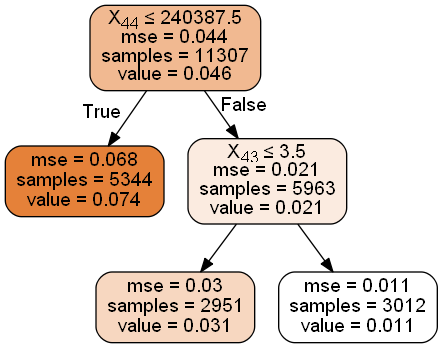

In [64]:
Image(graph.create_png())

##### Actually，value is badrate

In [65]:
sum(fn.bad_ind)/len(fn.bad_ind)

0.04607765101264703